In [1]:
# Import Relevants libraries

#For data analysis
import pandas as pd
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dataset
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features in the dataset and meaning:
- age - age in years,

- sex - (1 = male; 0 = female),

- cp - chest pain type (0: no chest pain, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),

- trestbps - resting blood pressure (in mm Hg on admission to the hospital),

- chol - serum cholestoral in mg/dl,

- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),

- restecg - resting electrocardiographic results,

- thalach - maximum heart rate achieved,

- exang - exercise induced angina (1 = yes; 0 = no),

- oldpeak - ST depression induced by exercise relative to rest,

- slope - the slope of the peak exercise ST segment,

- ca - number of major vessels (0-3) colored by flourosopy,

- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,

- target - have disease or not (1=yes, 0=no).

In [3]:

#For better understanding and flow of analysis, i will rename some of the columns
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate',
             'exercise_induced_angina','st_depression','st_slope','num_major_vessel','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessel         303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessel           0
thalassemia                0
target                     0
dtype: int64


<AxesSubplot: >

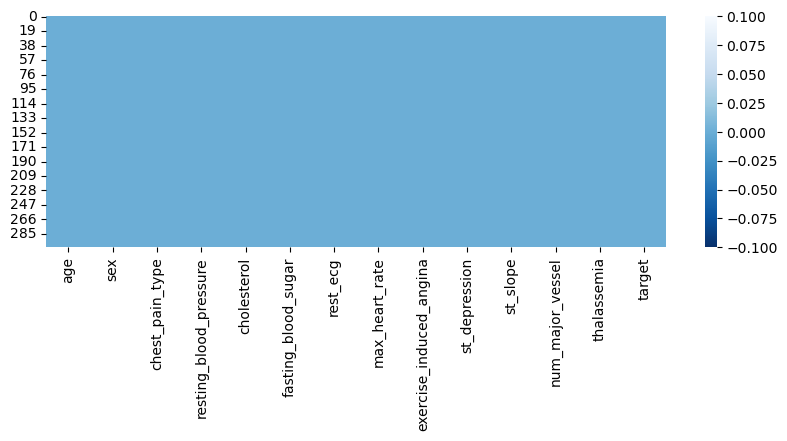

In [6]:
#Check for missing values
print(df.isnull().sum())

#Visualization the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

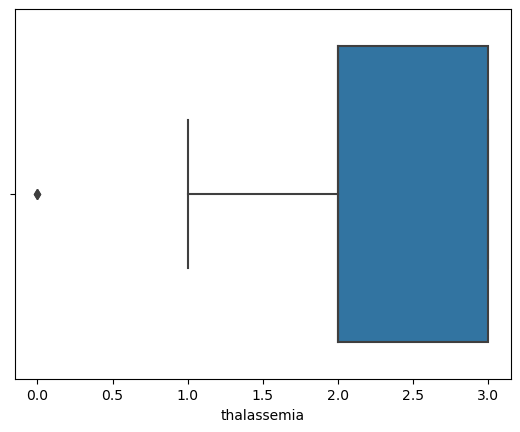

In [7]:
#checking for outliers
sns.boxplot(x=df["thalassemia"]);

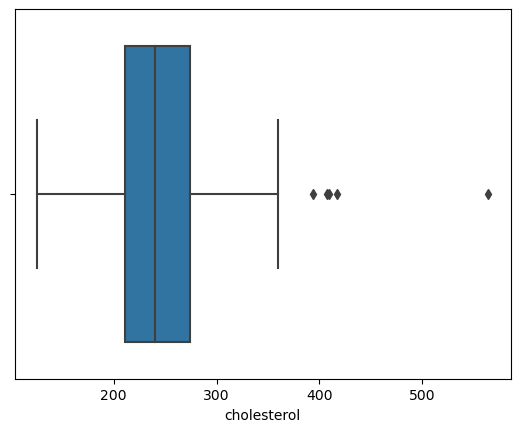

In [8]:
#checking for outliers
sns.boxplot(x=df["cholesterol"]);

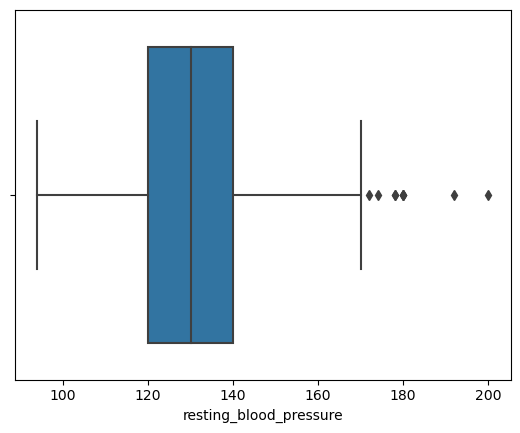

In [9]:
#checking for outliers
sns.boxplot(x=df["resting_blood_pressure"]);

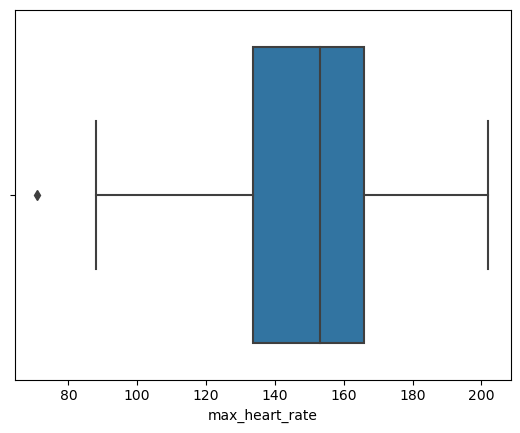

In [10]:
#checking for outliers
sns.boxplot(x=df["max_heart_rate"]);

Text(0.5, 1.0, 'Total Number of Patients')

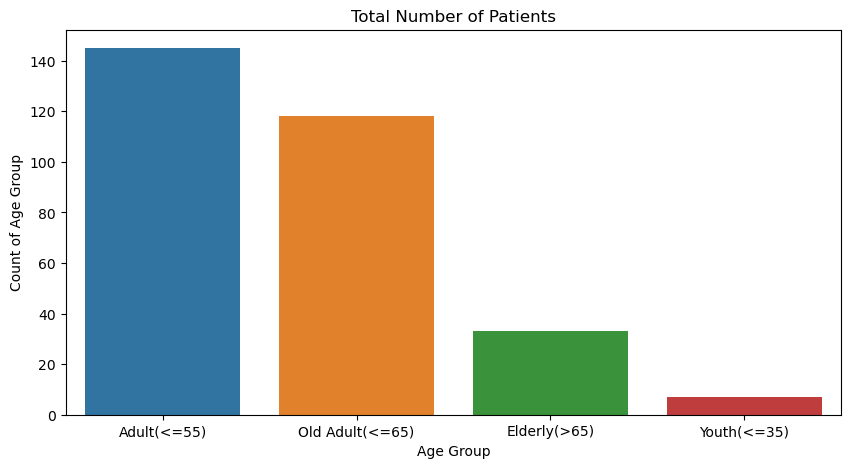

In [11]:
#Data Visualization 
#Age_bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
df['age_bracket'] = df['age'].apply(age_bracket)

#investigating the age group of patients
plt.figure(figsize=(10,5))
values = df['age_bracket'].value_counts(ascending=False).index
sns.countplot(x='age_bracket',data=df, order=values)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

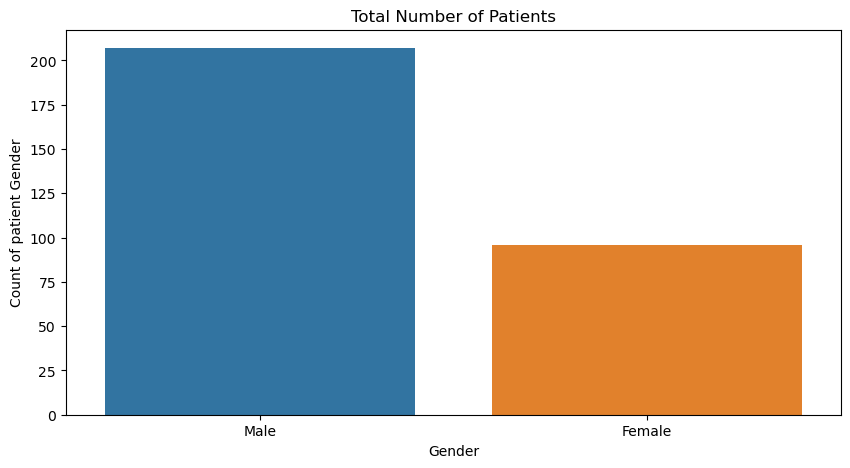

In [12]:
#Data Visualization 
#Sex

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df['gender'] = df['sex'].apply(gender)
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

asymptomatic        143
atypical angina      87
typical angina       50
non-anginal pain     23
Name: cp_cat, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

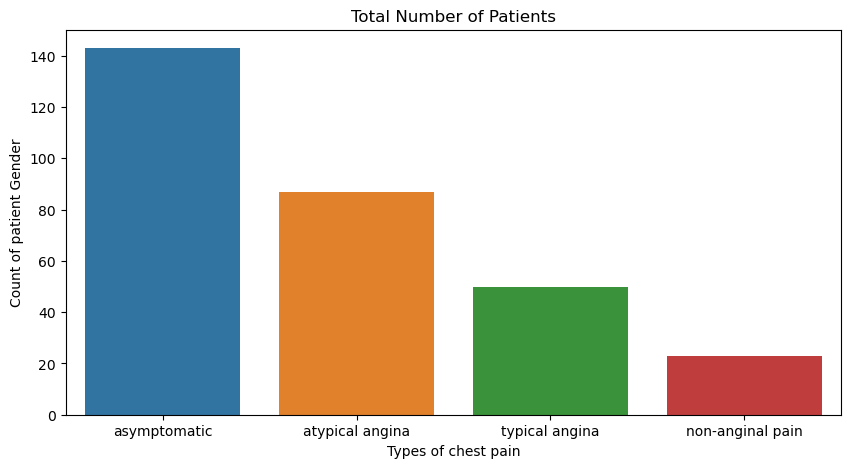

In [13]:
#Data Visualization 
#chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

#investigating the gender of patients
plt.figure(figsize=(10,5))
print(df['cp_cat'].value_counts())
values = df['cp_cat'].value_counts(ascending=False).index
sns.countplot(x='cp_cat',data=df, order=values)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Yes    165
No     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

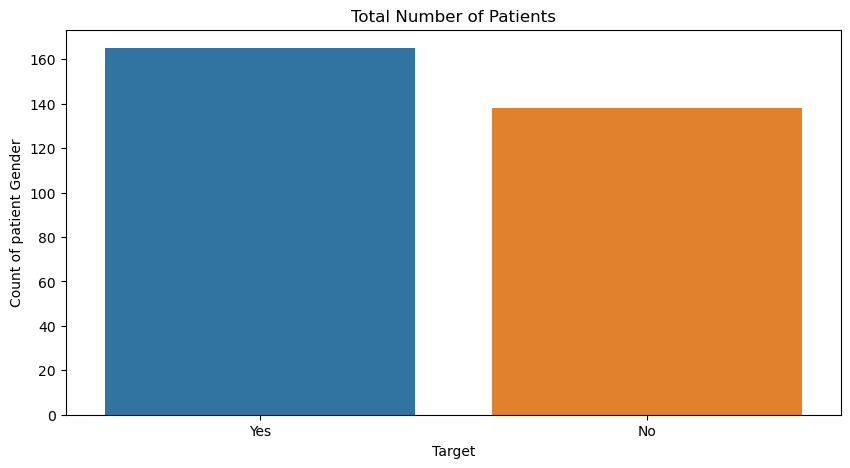

In [14]:
#Data Visualization 
#target - have disease or not (1=yes, 0=no)

def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"

df['label'] = df['target'].apply(label)

#investigating the gender of patients
plt.figure(figsize=(10,5))
print(df['label'].value_counts())
values = df['label'].value_counts(ascending=False).index
sns.countplot(x='label',data=df, order=values)
plt.xlabel('Target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

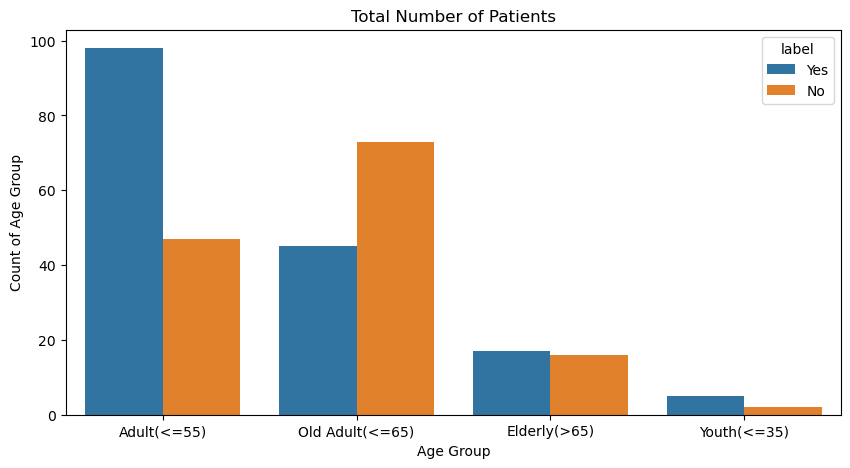

In [15]:
#investigating the age group of patients by target feature
plt.figure(figsize=(10,5))
values = df['age_bracket'].value_counts(ascending=False).index
sns.countplot(x='age_bracket',data=df, order=values, hue = 'label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

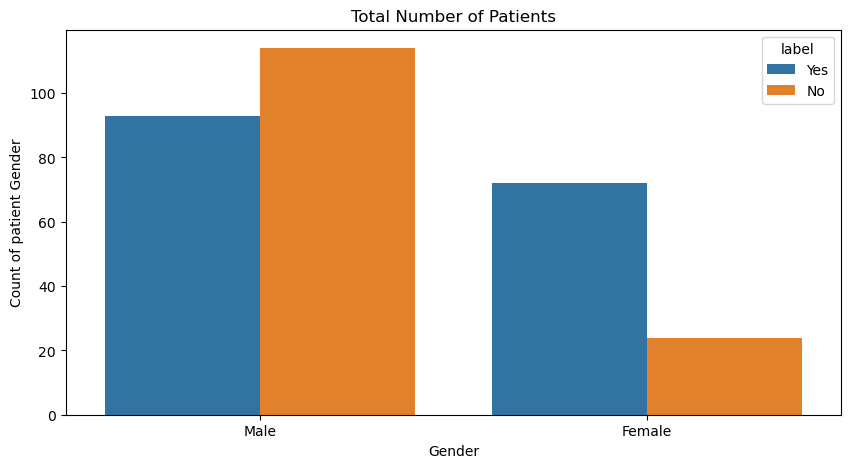

In [16]:
#investigating the gender of patients by target feature
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

asymptomatic        143
atypical angina      87
typical angina       50
non-anginal pain     23
Name: cp_cat, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

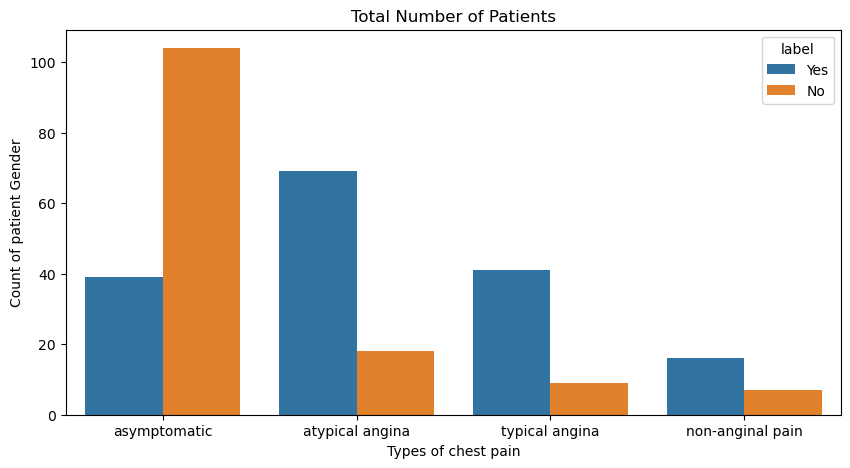

In [17]:
#investigating the gender of patients by target feature
plt.figure(figsize=(10,5))
print(df['cp_cat'].value_counts())
values = df['cp_cat'].value_counts(ascending=False).index
sns.countplot(x='cp_cat',data=df, order=values, hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

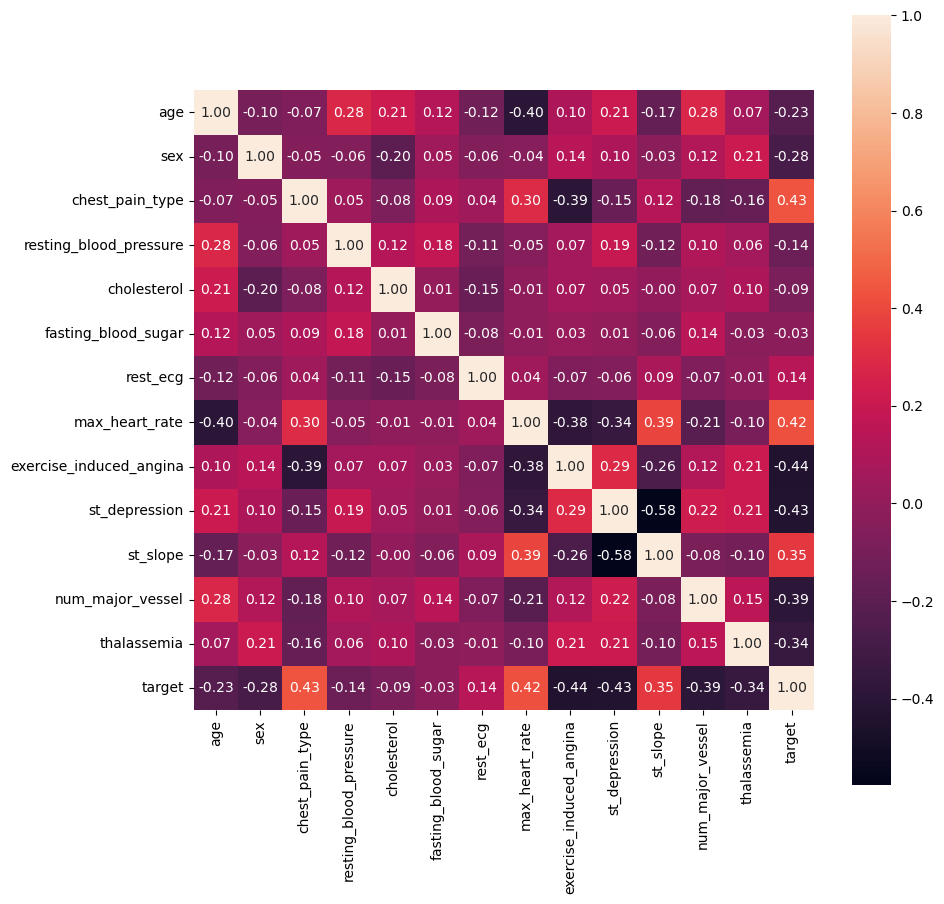

In [18]:
#Correlation between Target and other variables in the dataset
plt.figure(figsize=(10,10))

heatmap = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [19]:
df.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes


In [20]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessel', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'label'],
      dtype='object')

In [21]:
#Create a copy of the data (Exclude target/Label)
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessel', 'thalassemia']]

label = df[['target']]

In [22]:
df1.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [23]:
label.head(3)

,target
0,1
1,1
2,1


In [24]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessel             int64
thalassemia                  int64
dtype: object

In [25]:
# dealing with outliers - 'resting blood pressure ','cholesterol','thalassemia','max heart rate'

#nomalize the data
Scaler = MinMaxScaler()

df1['scaled_rbp'] = Scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['scaled_chol'] = Scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['scaled_thal'] = Scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['scaled_max_heart_rate'] = Scaler.fit_transform(df1['max_heart_rate'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure','cholesterol','thalassemia','max_heart_rate'], axis=1, inplace=True)

df1.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessel,scaled_rbp,scaled_chol,scaled_thal,scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992


In [26]:
#split the dataset into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(df1,label,test_size=0.2,random_state=42)

In [27]:
# 8 Machine learning Algorithm will be applied to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [28]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassi

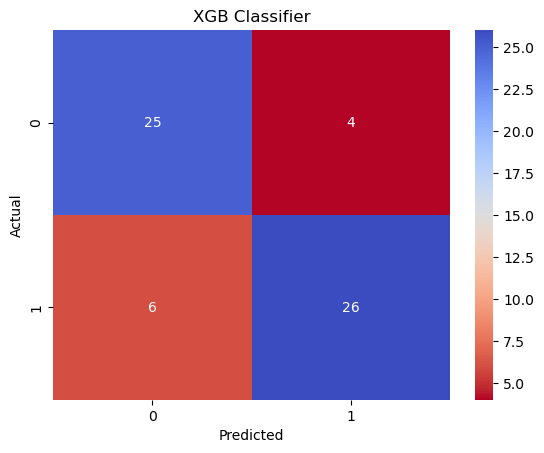

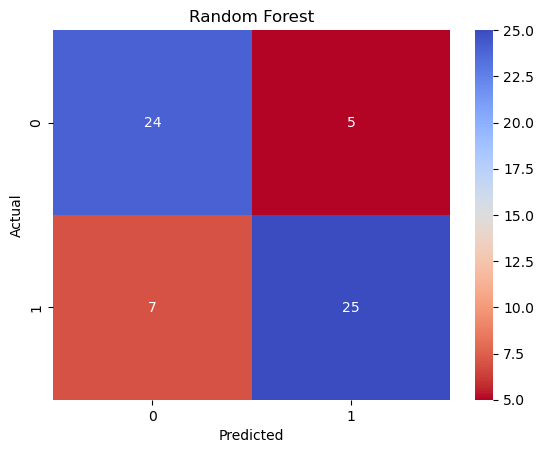

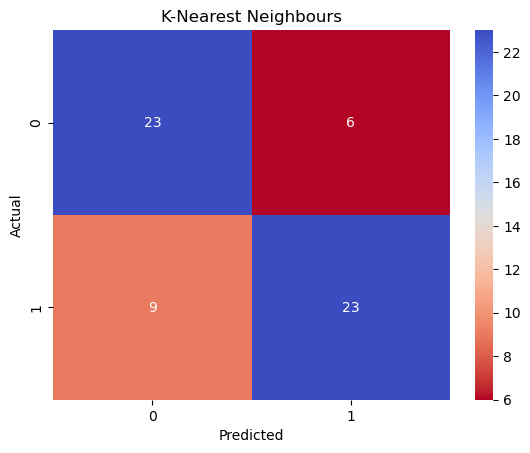

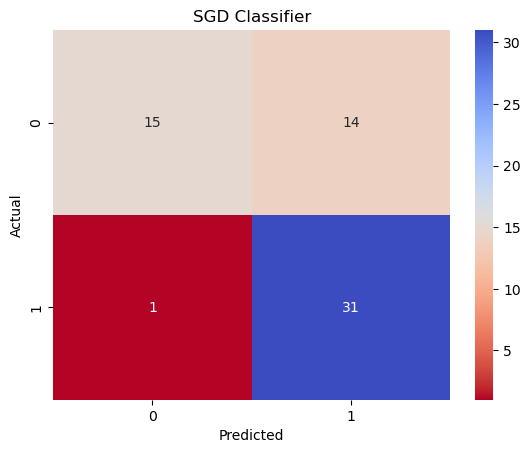

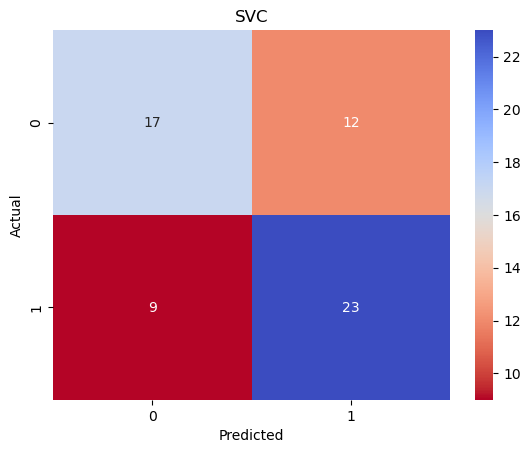

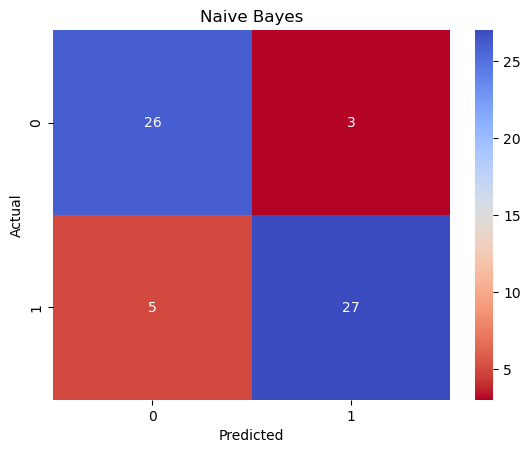

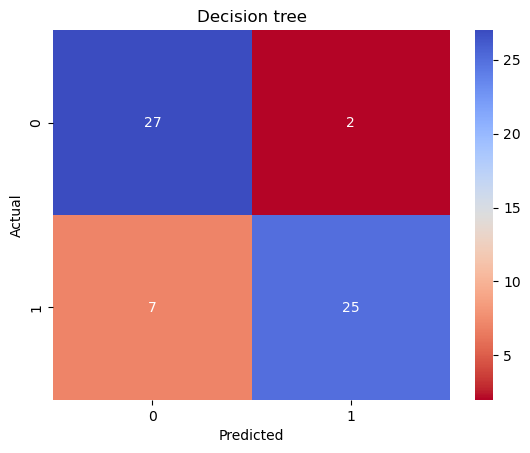

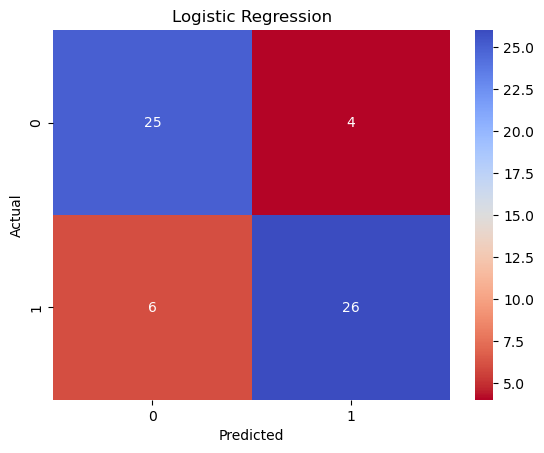

In [29]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
con_mat = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train,y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    con_m= confusion_matrix(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    #using the confusion matrix
    sns.heatmap(con_m, annot=True, cmap="coolwarm_r", fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(model_name)
    plt.show()
    
    if model_name != classifier[-1][1]:
        print('')
    
    

    
    

In [30]:
Overall_Accuracy = pd.DataFrame(acc_list)#, precision_list,recall_list,roc_list]))
Overall_Accuracy

,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.61%,80.33%,75.41%,75.41%,65.57%,86.89%,85.25%,83.61%


In [31]:
Overall_Precision = pd.DataFrame(precision_list)
Overall_Precision

,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.67%,83.33%,79.31%,68.89%,65.71%,90.0%,92.59%,86.67%


In [32]:
Overall_Recall = pd.DataFrame(recall_list)
Overall_Recall

,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.25%,78.12%,71.88%,96.88%,71.88%,84.38%,78.12%,81.25%


In [33]:
Overall_ROC = pd.DataFrame(roc_list)
Overall_ROC

,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.73%,80.44%,75.59%,74.3%,65.25%,87.02%,85.61%,83.73%
